In [523]:
%matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [526]:
train = pd.read_csv('DengueProject/dengue_features_train.csv')
labels = pd.read_csv('DengueProject/dengue_labels_train.csv')
test = pd.read_csv('DengueProject/dengue_features_test.csv')
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

train['week_start_date']=pd.to_datetime(df['week_start_date'])
test['week_start_date']=pd.to_datetime(test['week_start_date'])

df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [527]:
train=pd.merge(train, labels, on=['city', 'year', 'weekofyear'])
train.fillna(method='bfill', inplace=True)
test.fillna(method='bfill', inplace=True)
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [528]:
train['month']= train['week_start_date'].dt.month
train['year']= train['week_start_date'].dt.year
train.index = train['week_start_date']
del df['week_start_date']

df.head()


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [529]:
sj_test=test[test['city']=='sj']
iq_test=test[test['city']=='iq']


sj.fillna(method='bfill', inplace=True)
iq.fillna(method='bfill', inplace=True)

sj_test.fillna(method='bfill', inplace=True)
sj_test.fillna(method='bfill', inplace=True)


In [555]:
#a look into rolling mean and std and the Dickey_Fuller test 

#Sources i used and tutroial we looked at for stationarity and ARIMA modeling:

#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMA.html
#http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/



from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window= 52)
    rolstd = pd.rolling_std(timeseries, window= 52)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


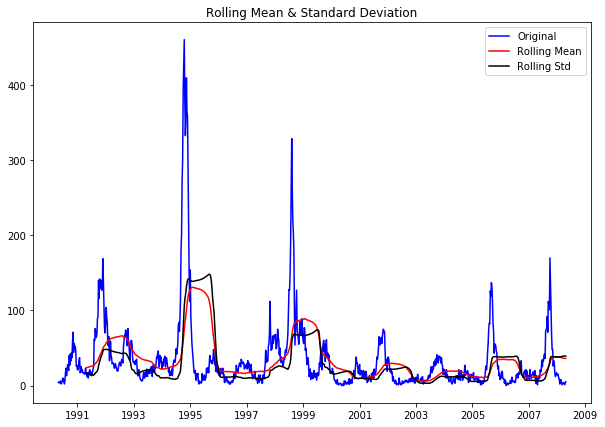

Results of Dickey-Fuller Test:
Test Statistic                -6.650078e+00
p-value                        5.147319e-09
#Lags Used                     9.000000e+00
Number of Observations Used    9.260000e+02
Critical Value (1%)           -3.437432e+00
Critical Value (5%)           -2.864666e+00
Critical Value (10%)          -2.568435e+00
dtype: float64


In [532]:
plt.figure(figsize=(10,7))
test_stationarity(sj['total_cases'])

#test static < 1% critical value, good ofor dealing with stationarity

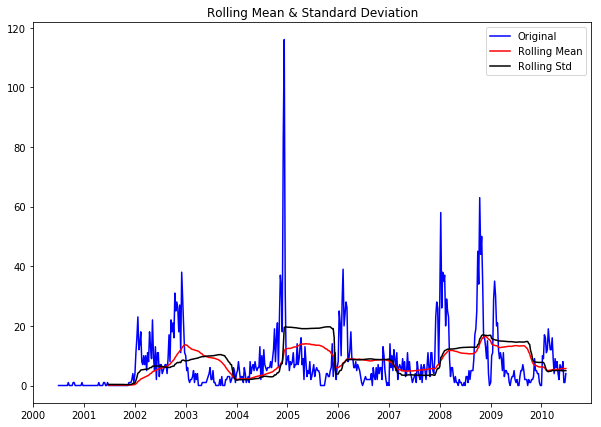

Results of Dickey-Fuller Test:
Test Statistic                -6.085429e+00
p-value                        1.067252e-07
#Lags Used                     4.000000e+00
Number of Observations Used    5.150000e+02
Critical Value (1%)           -3.443112e+00
Critical Value (5%)           -2.867168e+00
Critical Value (10%)          -2.569768e+00
dtype: float64


In [534]:
plt.figure(figsize=(10,7))
test_stationarity(iq['total_cases'])

#same as SJ

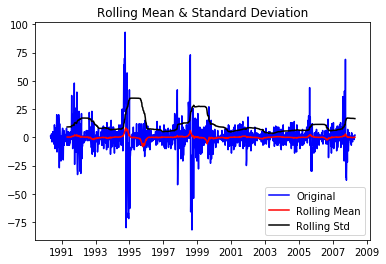

Results of Dickey-Fuller Test:
Test Statistic                -1.022797e+01
p-value                        5.117134e-18
#Lags Used                     1.200000e+01
Number of Observations Used    9.220000e+02
Critical Value (1%)           -3.437462e+00
Critical Value (5%)           -2.864680e+00
Critical Value (10%)          -2.568442e+00
dtype: float64


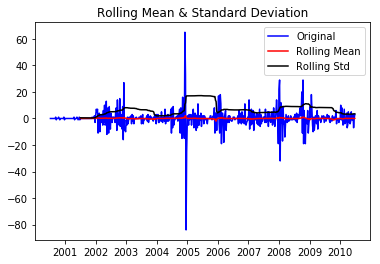

Results of Dickey-Fuller Test:
Test Statistic                -1.168212e+01
p-value                        1.731344e-21
#Lags Used                     5.000000e+00
Number of Observations Used    5.130000e+02
Critical Value (1%)           -3.443162e+00
Critical Value (5%)           -2.867190e+00
Critical Value (10%)          -2.569780e+00
dtype: float64


In [535]:
# Improving stationarity by differencing. Take first difference and then first seasonal difference
sj['first_difference'] = sj.total_cases -sj.total_cases.shift(1)
test_stationarity(sj.first_difference.dropna(inplace=False))

iq['first_difference'] = iq.total_cases -iq.total_cases.shift(1)
test_stationarity(iq.first_difference.dropna(inplace=False))
#plt.plot(ts_log)

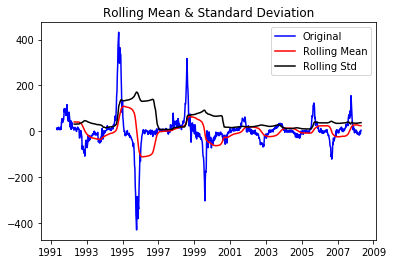

Results of Dickey-Fuller Test:
Test Statistic                  -4.863706
p-value                          0.000041
#Lags Used                      12.000000
Number of Observations Used    871.000000
Critical Value (1%)             -3.437880
Critical Value (5%)             -2.864864
Critical Value (10%)            -2.568540
dtype: float64


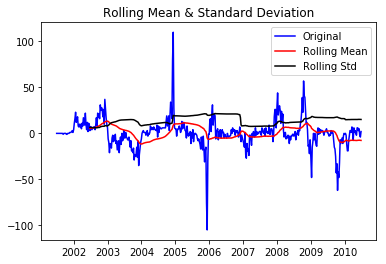

Results of Dickey-Fuller Test:
Test Statistic                -5.867947e+00
p-value                        3.291541e-07
#Lags Used                     4.000000e+00
Number of Observations Used    4.630000e+02
Critical Value (1%)           -3.444553e+00
Critical Value (5%)           -2.867803e+00
Critical Value (10%)          -2.570106e+00
dtype: float64


In [536]:
#seaosnal difference every 52 obsercations (weeks)
sj['seasonal_difference'] = sj.total_cases -sj.total_cases.shift(52)
test_stationarity(sj.seasonal_difference.dropna(inplace=False))

iq['seasonal_difference'] = iq.total_cases -iq.total_cases.shift(52)
test_stationarity(iq.seasonal_difference.dropna(inplace=False))


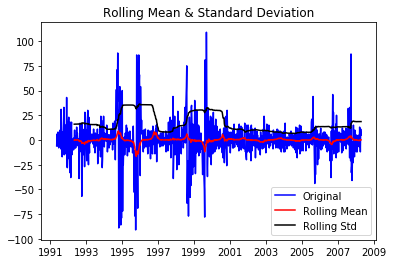

Results of Dickey-Fuller Test:
Test Statistic                -1.046406e+01
p-value                        1.335837e-18
#Lags Used                     1.200000e+01
Number of Observations Used    8.700000e+02
Critical Value (1%)           -3.437889e+00
Critical Value (5%)           -2.864868e+00
Critical Value (10%)          -2.568542e+00
dtype: float64


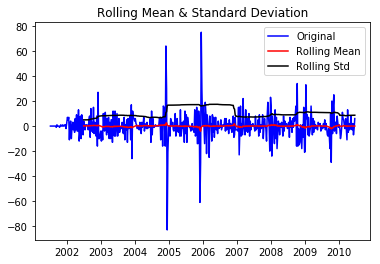

Results of Dickey-Fuller Test:
Test Statistic                -9.276254e+00
p-value                        1.286610e-15
#Lags Used                     1.100000e+01
Number of Observations Used    4.550000e+02
Critical Value (1%)           -3.444804e+00
Critical Value (5%)           -2.867913e+00
Critical Value (10%)          -2.570165e+00
dtype: float64


In [537]:
sj['seasonal_first_difference'] = sj.first_difference - sj.first_difference.shift(52)
test_stationarity(sj.seasonal_first_difference.dropna(inplace=False))

iq['seasonal_first_difference'] = iq.first_difference - iq.first_difference.shift(52)
test_stationarity(iq.seasonal_first_difference.dropna(inplace=False))

In [514]:
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf


sj.seasonal_first_difference.iloc[52:].head()

week_start_date
1991-04-30    NaN
1991-05-07   -6.0
1991-05-14    6.0
1991-05-21   -6.0
1991-05-28    2.0
Name: seasonal_first_difference, dtype: float64

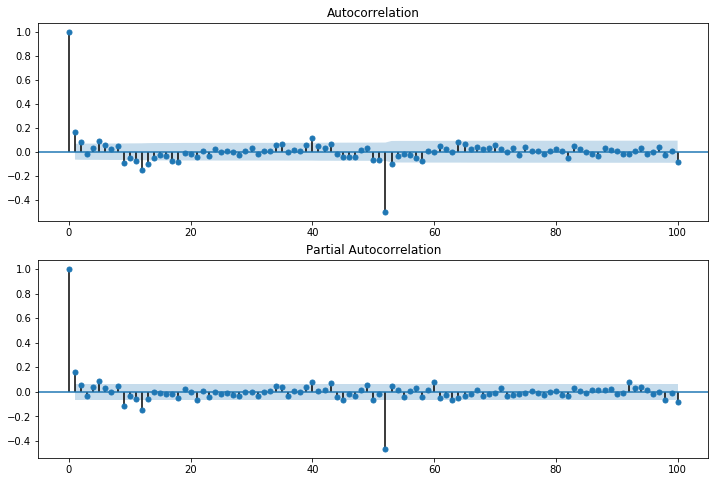

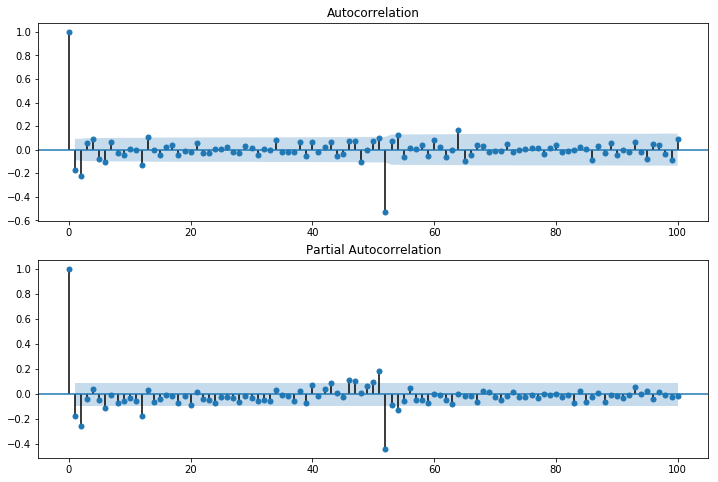

In [539]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sj.seasonal_first_difference.iloc[53:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sj.seasonal_first_difference.iloc[53:], lags=100, ax=ax2)



fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(iq.seasonal_first_difference.iloc[53:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(iq.seasonal_first_difference.iloc[53:], lags=100, ax=ax2)

#acf shows signoificant correlation on the first two time lags for both cities
# And then again at week 50 meaning a year has gone by due to seasonality.
#pcf shoows one significant lag in the first weeks for SJ but two weeks of sig  for IQ

Test MSE: 6.121


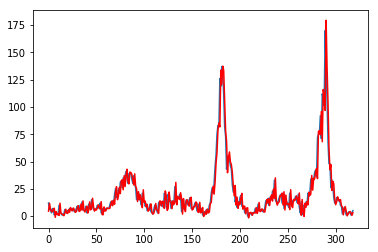

In [540]:
#from the acf we got 2 lags = 2AR and 1 lags pcf = 1MA for SJ, meaning a 2,1,1 model

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot 
sj['total_cases']=sj['total_cases'].astype(float)
series = sj['total_cases']
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = sm.tsa.ARIMA(history, order=(2,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

error = mean_absolute_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



In [517]:
print(len(sj_test))

260


In [546]:
sj_forecast= model_fit.forecast(260)

Test MSE: 4.635


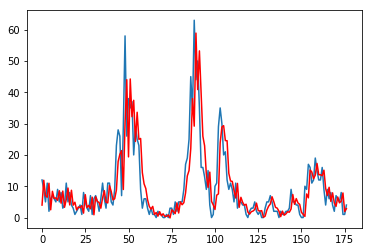

In [551]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot 

#from the acf we got 2 lags = 2AR and 2 lags pcf = 1MA for SJ, meaning a 2,1,2 model

iq['total_cases']=iq['total_cases'].astype(float)
series = iq['total_cases']
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = sm.tsa.ARIMA(history, order=(2,1,2))
	model_fit1 = model.fit(disp=0)
	output = model_fit1.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_absolute_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [552]:
print(len(iq_test))

156


In [553]:
iq_forecast= model_fit1.forecast(156)


In [554]:
submission = pd.read_csv("DengueProject/submission_format.csv",
                         index_col=[0, 1, 2])


submission.total_cases = np.concatenate([sj_forecast[0], iq_forecast[0]])
submission['total_cases'] = submission['total_cases'].astype(int)



submission.to_csv("ARIMA2.csv")